In [1]:
# 探索房屋数据集
import pandas as pd 
df = pd.read_csv("house_data.csv")
# 查看数据集的前几行数据
df.head()


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

# 可视化房屋数据集的特征


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# 设置内容，是的图在jupyter notebook中显示出来
sns.set(context = 'notebook')

In [5]:
#设置维度：人口百分比，房屋年限，与市中心的距离，犯罪率，税，平均房间数
cols = ['LSTAT','AGE','DIS','CRIM','MEDV','TAX','RM']

In [6]:
# 画图：在后台显示图并设置图的大小为2.5
sns.pairplot(df[cols],size=2.5)

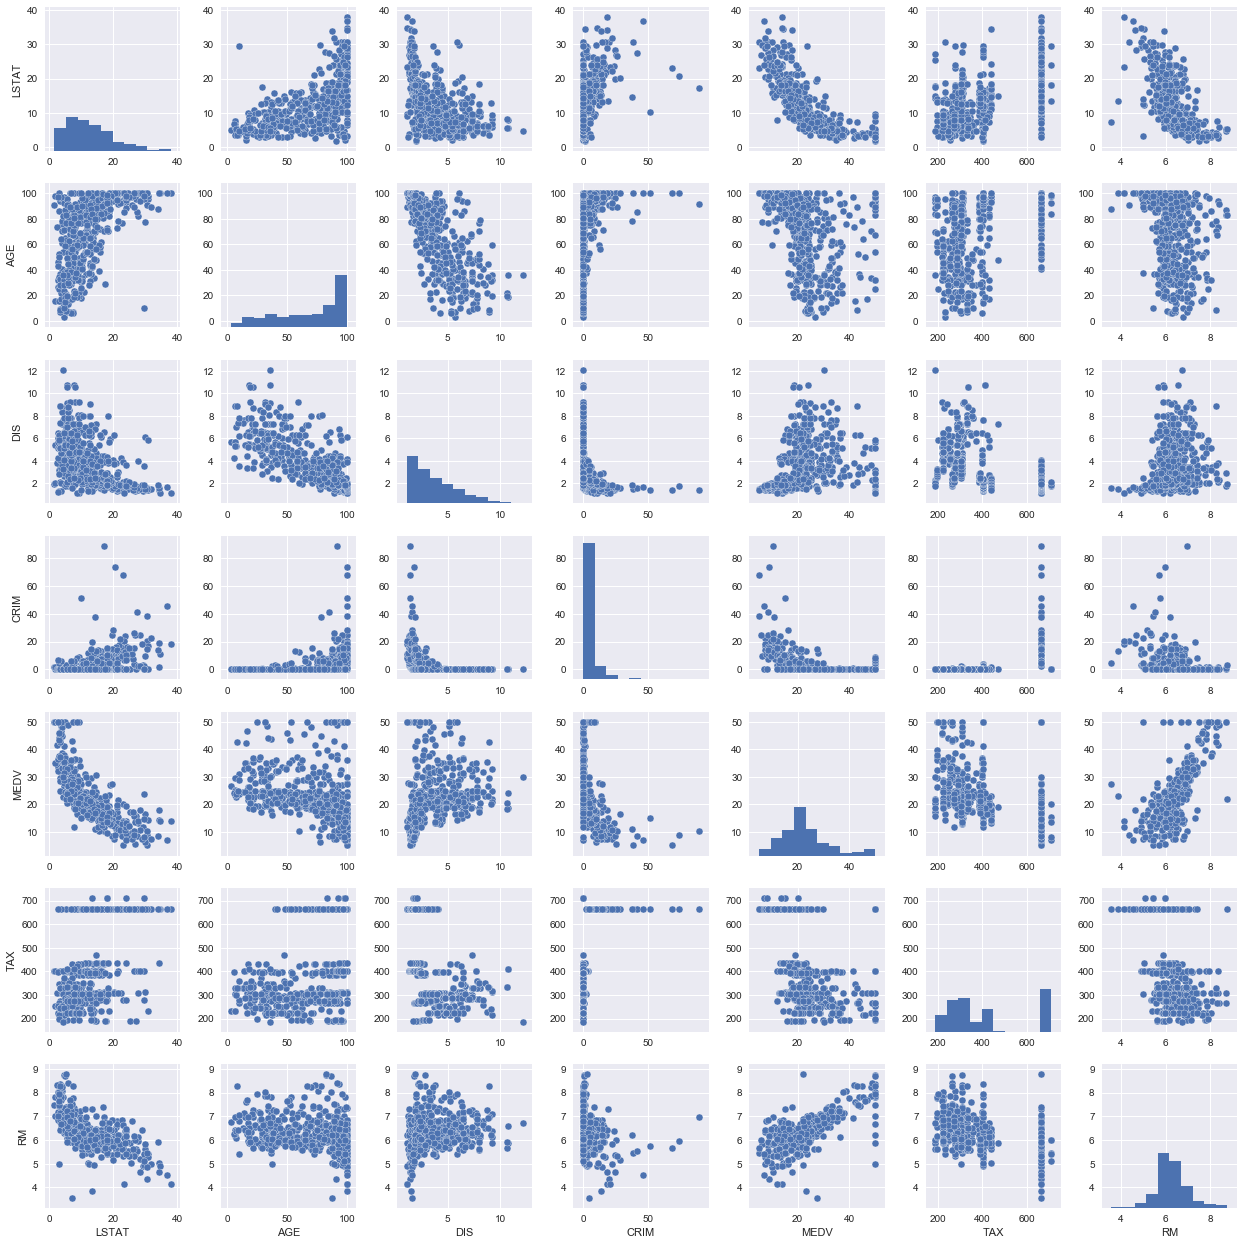

In [11]:
# 在前台展示图片：两两维度的相关性
plt.show()

# 实现线性回归模型

## 通过梯度下降法计算回归参数，实现线性回归模型

In [7]:
import numpy as np

In [8]:
class LinearRegressionByMyself(object):
    def __init__(self, Learning_rate = 0.001, epoch = 20):
        # 初始化学习率和迭代次数
        self.Learning_rate = Learning_rate
        self.epoch = epoch
     
    # 训练方法：X为原始训练数据（即除了房价以外的其它属性），y为标签（即房价）
    def fit(self, X, y):
        # 系数
        self.w = np.zeros(1 + X.shape[1])
        # 迭代误差列表
        self.cost_list = []
        
        for i in range(self.epoch):
            #计算出最初的初始化数据
            output =self.Regression_input(X)
            #针对原始的回归系数计算出误差
            error = (y - output)
            #系数向量
            self.w[1:] += self.Learning_rate * X.T.dot(error)
            self.w[0] += self.Learning_rate * error.sum()
            #更新后的系数
            cost = (error ** 2).sum() / 2.0
            self.cost_list.append(cost)
        return self
    
    def Regression_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return self.Regression_input(X)

### 通过人口百分比来预测房价

In [9]:
X = df[['LSTAT']].values

In [36]:
y = df[['MEDV']].values

#### 实现数据归一化

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
StandardScaler_x = StandardScaler()

In [39]:
StandardScaler_y = StandardScaler()

In [40]:
X_Standard = StandardScaler_x.fit_transform(X)

In [41]:
y_Standard = StandardScaler_y.fit_transform(y)

In [42]:
model = LinearRegressionByMyself()

In [43]:
model.fit(X_Standard, y_Standard)

ValueError: non-broadcastable output operand with shape (1,) doesn't match the broadcast shape (1,506)

In [44]:
plt.plot(range(1, model.epoch+1), model.cost_list)

ValueError: x and y must have same first dimension

##### 对图像进行处理

In [45]:
#设置y轴的标签为SSE
plt.ylabel('SSE')

In [46]:
#设置x轴的标签为迭代次数Epoch
plt.xlabel('Epoch')

In [47]:
plt.show()

In [48]:
# 可视化回归模型
def Regression_plot(X,y, model):
    #画出散点图
    plt.scatter(X, y, c = 'blue')
    #画出直线
    plt.plot(X, model.predict(X), color = 'red')
    return None

In [49]:
Regression_plot(X_Standard,y_Standard, model)

In [50]:
#对x轴进行标注
plt.xlabel('Percentage of the population')

In [51]:
#对y轴进行标注
plt.ylabel('House price')

In [52]:
plt.show()

In [53]:
#对新点进行归一化处理
Percentage_standard = StandardScaler_x.transform([2.5])

C:\Users\shengmei\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [54]:
#将新点带入模型预测房价
Price_standard = model.predict(Percentage_standard)

In [55]:
print("House pricer:%.3f"%StandardScaler_y.inverse_transform(Price_standard))

ValueError: non-broadcastable output operand with shape () doesn't match the broadcast shape (1,)

In [56]:
print('Slope:%.3f' % model.w[1])

Slope:0.000


In [57]:
print('Intercept:%.3f' % model.w[0])

Intercept:0.000


# 使用sklearn来构建回归模型

In [261]:
from sklearn.linear_model import LinearRegression

In [262]:
#构建模型
sk_model = LinearRegression()

In [263]:
sk_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [264]:
print('Slope: %.3f'% sk_model.coef_[0])

Slope: 9.102


In [265]:
print('Inercept:%.3f'% sk_model.intercept_)

Inercept:-34.671


In [266]:
Regression_plot(X, y, sk_model)

In [267]:
plt.xlabel('Percentage of the population')

Text(0.5,0,'Percentage of the population')

In [268]:
plt.ylabel('House Price')

Text(0,0.5,'House Price')

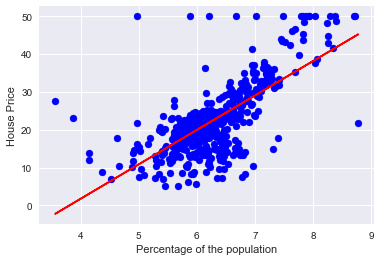

In [269]:
plt.show()

# 评估线性回归模型

In [270]:
from sklearn.cross_validation import train_test_split

In [271]:
cols = ['LSTAT','AGE','DIS','CRIM','TAX','RM']

In [272]:
X = df[cols].values

In [273]:
y = df['MEDV'].values

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [275]:
sk_model = LinearRegression()

In [276]:
sk_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [277]:
y_train_predict = sk_model.predict(X_train)

In [278]:
y_test_predict = sk_model.predict(X_test)

In [279]:
plt.scatter(y_train_predict, y_train_predict - y_train, c = 'red', marker = 'x', label = 'Trainning data')

In [280]:
plt.scatter(y_test_predict, y_test_predict - y_test, c = 'black', marker = 'o', label = 'Test data')

In [281]:
plt.xlabel('Predicted values')

Text(0.5,0,'Predicted values')

In [282]:
plt.ylabel('Residuals')

Text(0,0.5,'Residuals')

In [283]:
plt.legend(loc = 'upper left')

In [284]:
plt.hlines(y=0,xmin=0,xmax=50,lw=1,color='green')

In [285]:
plt.xlim([-10,50])

(-10, 50)

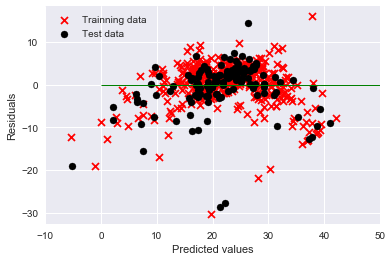

In [286]:
plt.show()

In [287]:
#第一种评估的标准
from sklearn.metrics import mean_squared_error

In [288]:
print('MSE train %.3f, test %.3f'%(mean_squared_error(y_train,y_train_predict),mean_squared_error(y_test,y_test_predict)))

MSE train 25.106, test 36.671


In [289]:
#第二种评估标准
from sklearn.metrics import r2_score

In [290]:
print('MSE train %.3f, test %.3f'%(r2_score(y_train,y_train_predict),r2_score(y_test,y_test_predict)))

MSE train 0.706, test 0.551


# 建模房屋数据集里的非线性关系

## 用平均房间数预测房价

In [294]:
X= df[['RM']].values

In [295]:
y = df['MEDV'].values

In [296]:
#初始化模型
Regression_model = LinearRegression()

In [297]:
from sklearn.preprocessing import PolynomialFeatures

In [175]:
#二次变换
quadratic = PolynomialFeatures(degree = 2)

In [176]:
#三次线性变换
cubic = PolynomialFeatures(degree = 3)

In [177]:
X_squared = quadratic.fit_transform(X)

In [178]:
X_cubic = cubic.fit_transform(X)

In [180]:
X_fit = np.arange(X.min(), X.max(), 0.01)[:,np.newaxis]

#### 画出线性曲线

In [183]:
Linear_model = Regression_model.fit(X, y)

In [184]:
y_line_fit = Linear_model.predict(X_fit)

In [185]:
linear_r2 = r2_score(y, Linear_model.predict(X))

#### 画出二次曲线

In [186]:
Squared_model = Regression_model.fit(X_squared, y)

In [187]:
y_quad_fit = Squared_model.predict(quadratic.fit_transform(X_fit))

In [188]:
quadratic_r2 = r2_score(y,Squared_model.predict(X_squared))

#### 画出三次曲线

In [191]:
Cubic_model = Regression_model.fit(X_cubic, y)

In [192]:
y_cubic_fit = Cubic_model.predict(cubic.fit_transform(X_fit))

In [193]:
cubic_r2 = r2_score(y,Cubic_model.predict(X_cubic))

#### 患处散点图

In [195]:
plt.scatter(X,y,label='Trainning point',color = 'lightgray')

In [196]:
plt.plot(X_fit, y_line_fit, label ='linear,$R^2=%.2f$' % linear_r2, color = 'blue',lw = 2, linestyle = ':')

In [197]:
plt.plot(X_fit, y_quad_fit, label ='quadratic,$R^2=%.2f$' % quadratic_r2, color = 'red',lw = 2, linestyle = '-')

In [198]:
plt.plot(X_fit, y_cubic_fit, label ='cubic,$R^2=%.2f$' % cubic_r2, color = 'green',lw = 2, linestyle = '--')

In [199]:
plt.xlabel('Room number')

Text(0.5,0,'Room number')

In [200]:
plt.ylabel('House price')

Text(0,0.5,'House price')

In [201]:
plt.legend(loc = 'upper left')

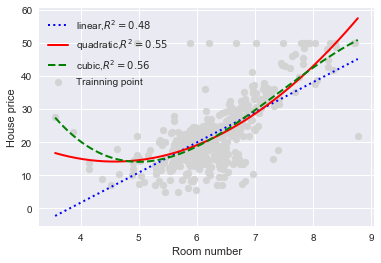

In [202]:
plt.show()
